## Оглавление:
* [Шаг 1. Откройте файл](#first-bullet)
* [Шаг 2. Предобработка данных](#second-bullet)
* [Шаг 3. Проанализируйте данные](#third-bullet)
* [Шаг 4. Составьте портрет пользователя каждого региона](#fourth-bullet)
* [Шаг 5. Проверьте гипотезы](#fifth-bullet)
* [Шаг 6. Общий вывод](#sixth-bullet)

# Определение успешности игры
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="first-bullet"></a>

In [1]:
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
df = pd.read_csv('/datasets/games.csv')
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14389,Flipper Critters,DS,2007.0,Simulation,0.03,0.00,0.00,0.00,60.0,tbd,E
1727,Romancing SaGa 2,SNES,1993.0,Role-Playing,0.00,0.00,1.17,0.00,NaN,NaN,NaN
10173,Guitar Rock Tour,DS,2007.0,Misc,0.10,0.00,0.00,0.01,60.0,tbd,E10+
3046,Finding Nemo,XB,2003.0,Action,0.48,0.16,0.00,0.02,63.0,tbd,E
5833,"Army Men World War: Land, Sea, Air",PS,2000.0,Action,0.17,0.12,0.00,0.02,NaN,NaN,NaN
1128,Pikmin,GC,2001.0,Strategy,0.78,0.25,0.56,0.04,89.0,8.7,E
5373,Thunderstrike: Operation Phoenix,PS2,2001.0,Simulation,0.17,0.13,0.00,0.04,65.0,8.1,T
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
7491,Jikkyou Powerful Pro Yakyuu 2012,PS3,2012.0,Action,0.00,0.00,0.21,0.00,NaN,NaN,NaN
12314,BMX XXX,GC,2002.0,Sports,0.05,0.01,0.00,0.00,60.0,5,M


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица состоит из 11 столбцов и 16715 строк. В названиях игр и платформ встречаются разные написания слов: только  большими буквами, слова с заглавной буквы, предлоги с маленькой и т.д. Та же проблема в названиях столбцов. В столбцах с названием, годом выпуска, жанром и оценками есть пропуски. Много нулевых значений в данных с продажами по разным регионам, что скорее всего связано с тем, что данные с миллионах, а продано было гораздо меньше. Тип данных в столбцах с годом и оценкой пользователей не соответствует содержащейся в них информации.

### Шаг 2. Предобработка данных <a name="second-bullet"></a>

Приведем к нижнему регистру названия столбцов и содержание столбцов содержащих текст.

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Проверим на наличие дубликатов
df.duplicated().sum()

0

In [6]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
9.6       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [7]:
df.query('user_score == "tbd"').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14534,power rangers super megaforce,3ds,2014.0,action,0.01,0.01,0.0,0.00,43.0,tbd,E10+
14873,teddy together,3ds,2016.0,simulation,0.00,0.02,0.0,0.00,NaN,tbd,NaN
7168,discovery kids: dolphin discovery,ds,2008.0,simulation,0.20,0.00,0.0,0.01,NaN,tbd,E
9316,monster jam,ds,2007.0,racing,0.12,0.00,0.0,0.01,NaN,tbd,E
16267,the book of unwritten tales 2,wiiu,2016.0,adventure,0.00,0.01,0.0,0.00,NaN,tbd,T
12885,major league baseball 2k11,psp,2011.0,sports,0.05,0.00,0.0,0.01,NaN,tbd,E
4100,ncaa football 09,ps2,2008.0,sports,0.40,0.02,0.0,0.07,NaN,tbd,E
16044,turbo: super stunt squad,wii,2013.0,sports,0.00,0.01,0.0,0.00,NaN,tbd,E
13998,texas hold 'em poker ds,ds,2005.0,misc,0.03,0.00,0.0,0.00,NaN,tbd,E
10496,brooktown high: senior year,psp,2007.0,simulation,0.09,0.00,0.0,0.01,51.0,tbd,T


In [8]:
df.query('name == "nba 2k11"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
795,nba 2k11,x360,2010.0,action,1.84,0.12,0.01,0.13,89.0,8.1,E
974,nba 2k11,ps3,2010.0,action,1.41,0.20,0.03,0.16,89.0,7.6,E
4018,nba 2k11,wii,2010.0,action,0.46,0.01,0.00,0.03,NaN,tbd,E
4623,nba 2k11,psp,2010.0,action,0.39,0.00,0.00,0.03,NaN,6.4,E
4724,nba 2k11,ps2,2010.0,action,0.34,0.01,0.00,0.06,NaN,tbd,E
7847,nba 2k11,pc,2010.0,action,0.18,0.00,0.00,0.01,82.0,8.6,E


In [9]:
df.query('name == "nfl blitz 20-02"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6173,nfl blitz 20-02,ps2,2002.0,sports,0.14,0.11,0.0,0.04,76.0,8.9,E
10850,nfl blitz 20-02,xb,2002.0,sports,0.07,0.02,0.0,0.00,77.0,tbd,E
11131,nfl blitz 20-02,gc,2002.0,sports,0.07,0.02,0.0,0.00,77.0,tbd,E


In [10]:
df.query('name == "namco museum: 50th anniversary"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
7304,namco museum: 50th anniversary,gc,2005.0,misc,0.17,0.04,0.0,0.01,60.0,tbd,E10+
7623,namco museum: 50th anniversary,gba,2005.0,misc,0.14,0.05,0.0,0.00,60.0,tbd,E
8191,namco museum: 50th anniversary,xb,2005.0,misc,0.13,0.04,0.0,0.01,62.0,tbd,E10+


In [11]:
df.query('name == "zumba fitness"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
669,zumba fitness,x360,2010.0,sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,zumba fitness,ps3,2010.0,sports,0.28,0.21,0.0,0.08,NaN,3.8,E


Столбец с оценкой пользователей имеет тип объект, т.к. он содержит значение 'tbd', которое используется 2424 раз. TBD — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, поэтому логично заменить их на NaN. Менять их на какие-то конкретные значения, например, среднее или медиану не стоит. Даже при наличии такой же  игры для других платформ, оценки могут сильно отличаться и заполнение, на основании этих данных, может привести к ошибкам.


Преобразуем данные в нужные типы. Год переведем в целое число, а оценки пользователей из типа object в число. Пропущенные данные в годах заменим на 0: во-первых, сразу понятно что это не реальные данные и делать выводы на основании них не нужно; во-вторых, пропуски могут помешать в дальнейшей обработке.

In [12]:
df['year_of_release'] = df['year_of_release'].fillna(value=0).astype('int')
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# Посмотрим на строки с отсутствующим названием
df[pd.isnull(df['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Получаются какие-то бесполезные данные о продажах неизвестно чего непонятного жанра, без оценок. Такие строки лучше удалить.

In [14]:
df = df.drop([659, 14244]).reset_index(drop=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df['rating'] = df['rating'].fillna(value='no_info')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,no_info
16709,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,no_info
16710,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_info
16711,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,no_info


In [16]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.000000
dtype: float64

In [17]:
# Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец. 
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
11004,jimmie johnson's anything with an engine,x360,2011,racing,0.08,0.00,0.00,0.01,65.0,8.8,E10+,0.09
8326,codename: kids next door: game boy advance vid...,gba,2004,misc,0.12,0.05,0.00,0.00,NaN,NaN,no_info,0.17
10022,lego knights' kingdom,gba,2004,action,0.08,0.03,0.00,0.00,62.0,NaN,E,0.11
7101,deca sports 3,wii,2010,sports,0.14,0.07,0.00,0.02,41.0,NaN,E,0.23
9311,backyard soccer,ps,2001,sports,0.07,0.05,0.00,0.01,NaN,NaN,E,0.13
900,mario party: island tour,3ds,2013,misc,0.62,0.64,0.55,0.11,57.0,6.3,E,1.92
1642,nba live 99,ps,1997,sports,1.13,0.05,0.00,0.03,NaN,NaN,no_info,1.21
8873,all-star baseball 2003,gba,2002,sports,0.11,0.04,0.00,0.00,77.0,NaN,E,0.15
2021,dragon ball z: budokai tenkaichi 3,wii,2007,fighting,0.32,0.36,0.26,0.09,72.0,8.4,T,1.03
6004,ken griffey jr.'s slugfest,n64,1999,sports,0.23,0.06,0.00,0.00,NaN,NaN,no_info,0.29


В результате обработки данных, мы привели написание наименований и содержания столбцов к единому формату, преобразовали данные о годах и оценках пользователей к нужному типу, и удалили строки с отсутствующим названием, т.к. почти вся остальная информация в них отсутствовала. 
У нас остались пропуски в столбцах с рейтингами. Заполнение их средним или медианой может привести к ошибочным выводам. Даже при наличии такой же  игры для других платформ, оценки могут сильно отличаться и заполнение, на основании этих данных, может привести к ошибкам. По этой же причине значение было принято решение 'tbd' заменить на NaN.

### Шаг 3. Проанализируйте данные <a name="third-bullet"></a>

In [18]:
# Посмотрим, сколько игр выпускалось в разные годы.

In [19]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

До 2000 года игр выпускалось очень мало. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.

In [20]:
df.groupby('platform')['all_sales'].agg(['sum']).sort_values('sum',ascending=False).head(10)

,sum
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


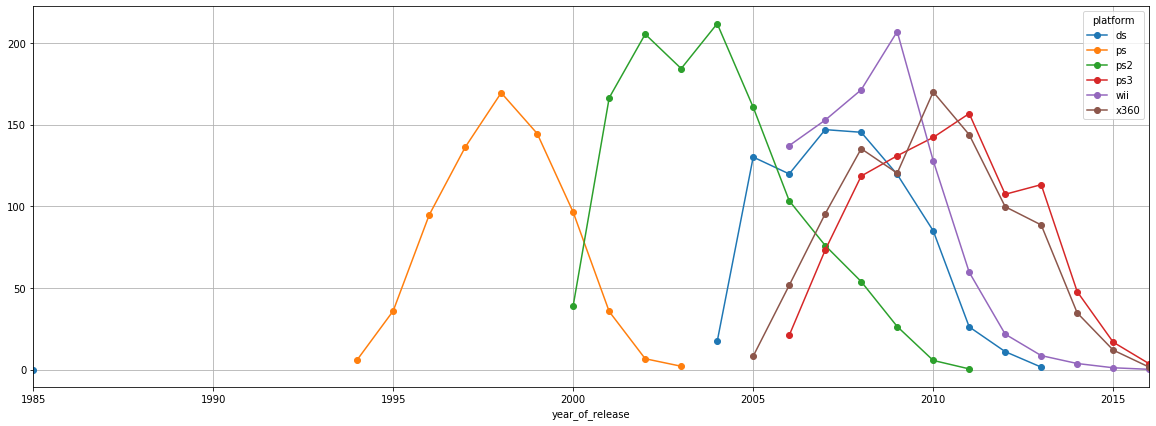

In [21]:
# Построим распределние продаж для каждой топовой платфоры по годам.
df_year = df[df['year_of_release'] != 0]
top_6 = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
df_year.query('platform == @top_6')\
     .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')\
     .plot(style='o-', grid=True, figsize=(20, 7))

Все платформы проходят примерно одинаковый путь: период подъема, пик продаж и спад. В среднем он занимает 9 лет. Явными лидерами по продажам являются 6 платформ: ps2, x360, ps3, wii, ds, ps - но их жизненный цикл уже завершился, либо подходит к концу. Нам же интересны перспективные платформы, рост продаж которых только начинается.

Так как нам интересны данные, которые помогут построить прогноз на 2017 год, логичнее взять для анализа максимально приближенные к нему года: с 2014 по 2016г. За 2016г данные хоть и не полные, но все же их не мало и они актуальны.

In [22]:
df_slice = df.query('2014 <= year_of_release <= 2016')
df_slice 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_info,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_info,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_info,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01
16705,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01
16708,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01
16710,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01


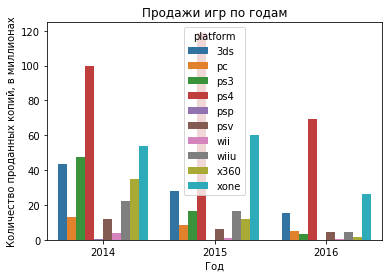

In [23]:
# Построим график продаж для каждой платформы за актуальный период
ax = df_slice.groupby(['platform', 'year_of_release']).agg({'all_sales': 'sum'}).reset_index()
sns.barplot(data=ax, x='year_of_release', y='all_sales', hue="platform", orient='v')
sns.set(rc={'figure.figsize':(20, 10)})
plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, в миллионах')
plt.show()

На графике видна сменяемость поколений платформ: игры для ps3 сменяются на игры для ps4, x360 - на xone, wii - на wiiu. Для ps3 пик продаж приходился на 2011 год и до 2016 года продажи постепенно идут на спад, при этом в 2013 году начинают расти продажи ps4 и на период 2016-2017г (т.е. на 4й-5й год существования) как раз должен приходиться пик продаж. Такая же ситуация и с xone, в 2016г.-2017г. должно быть продано максимальное количество копий. По продажам wiiu в 2017 году скорее всего ожидается спад. Даже с учетом неполных данных за 2016год и существования с 2011года, третья по продажам игр последние два года платформа 3ds. Может и в 2017 году, она останется в лидерах?

In [24]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


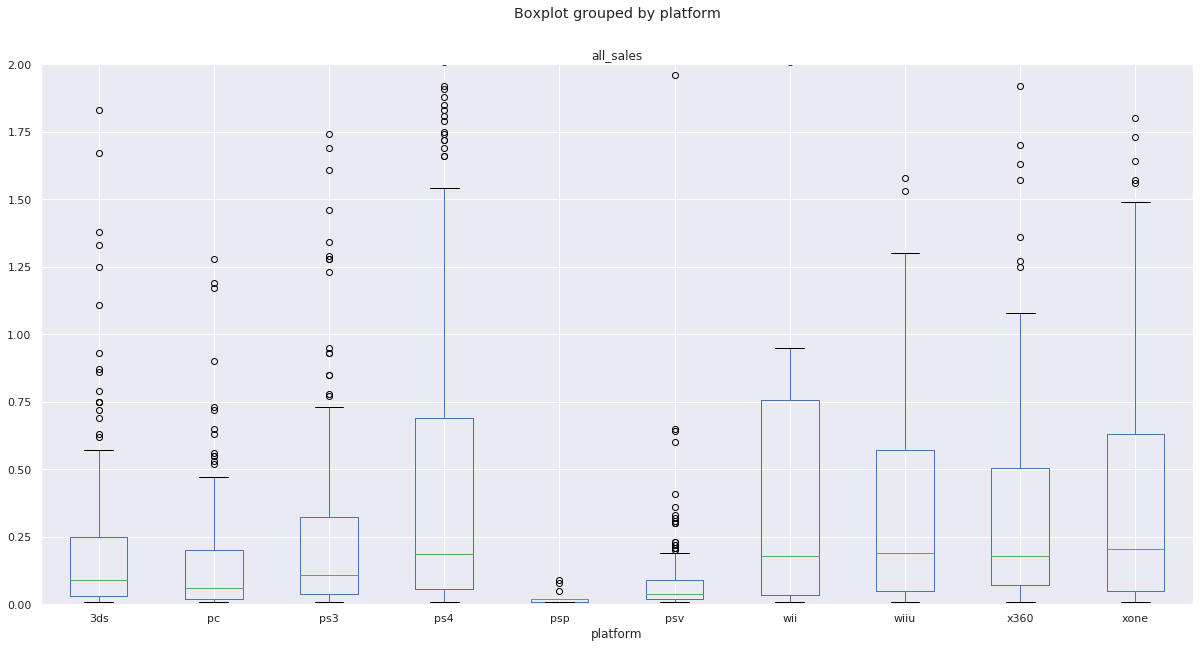

In [25]:
df_slice.boxplot('all_sales', by='platform', figsize=(20,10))
plt.ylim((0, 2))
plt.show()

На графике у платформ ps4, wii, wiiu, x360, xone самые большие медианные значения по продажам игр, кроме того их значения скошены вправо, значит у этих платформ больше игр, которые продаются бОльшим количеством копий.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


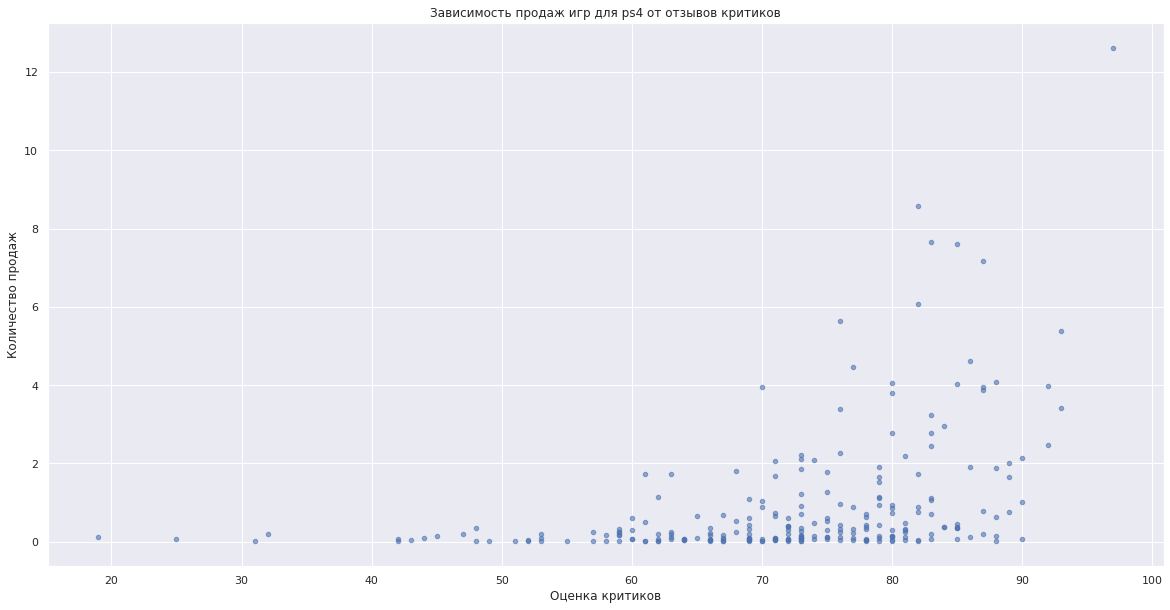

In [26]:
# Посмотрим, как влияют на продажи внутри популярных платформ ps4 и xone отзывы пользователей и критиков.
ps4 = df_slice.query('platform == "ps4"')
ps4.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.6)
plt.title('Зависимость продаж игр для ps4 от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

In [27]:
ps4['all_sales'].corr(ps4['critic_score'])

0.40266141068104083

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


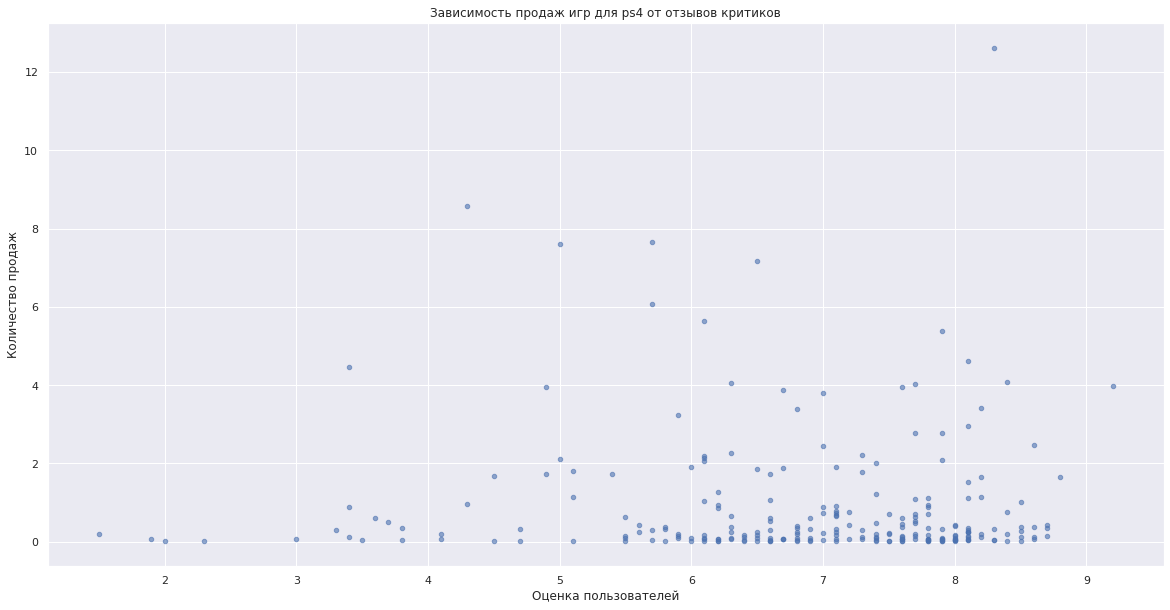

In [28]:
ps4.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.6)
plt.title('Зависимость продаж игр для ps4 от отзывов критиков')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [29]:
ps4['all_sales'].corr(ps4['user_score'])

-0.040131589472697356

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


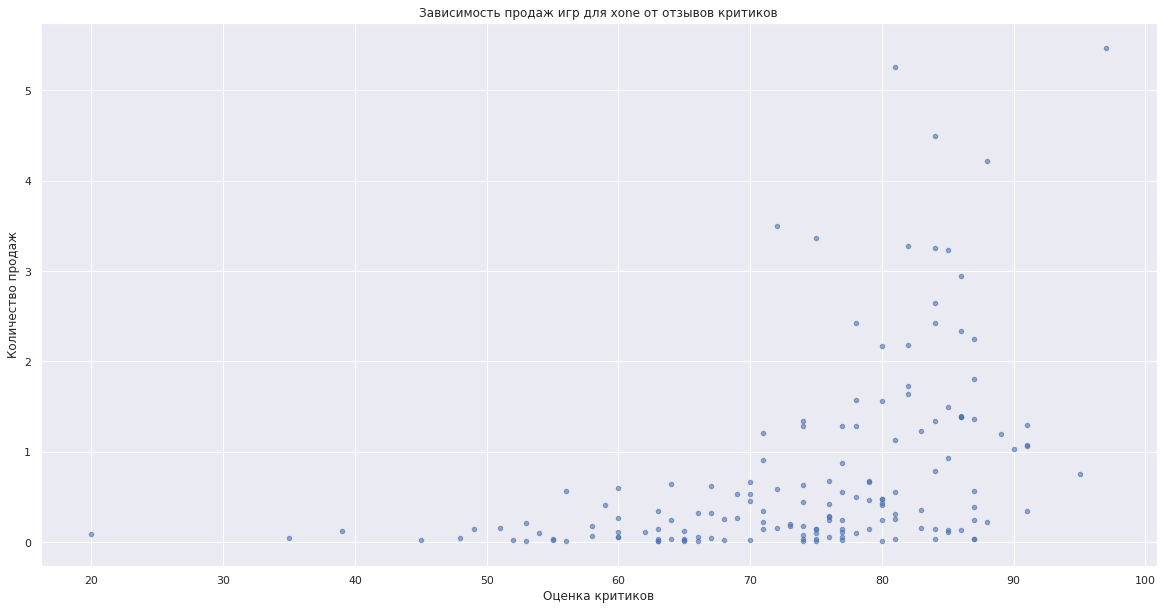

In [30]:
xone = df_slice.query('platform == "xone"')
xone.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.6)
plt.title('Зависимость продаж игр для xone от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

In [31]:
xone['all_sales'].corr(xone['critic_score'])

0.42867694370333226

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


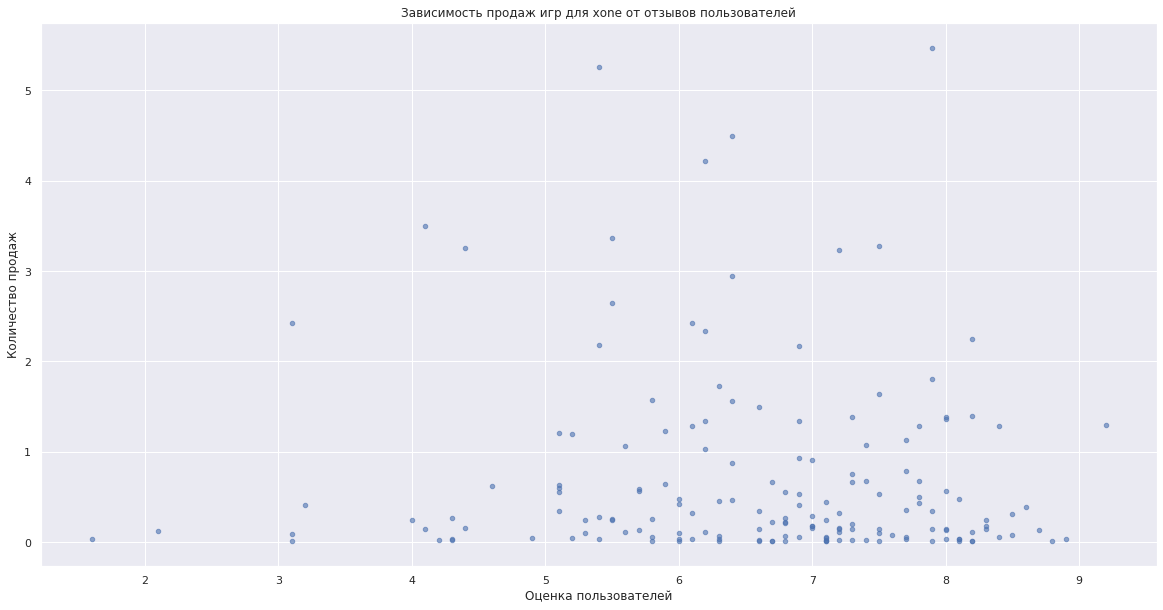

In [32]:
xone.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.6)
plt.title('Зависимость продаж игр для xone от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [33]:
xone['all_sales'].corr(xone['user_score'])

-0.0703839280647581

Очевидно, что оценки критиков достаточно сильно влияют на продажи, тогда как оценки пользователей практически не влияют. Это же показывают и коэффициенты коррелляции.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


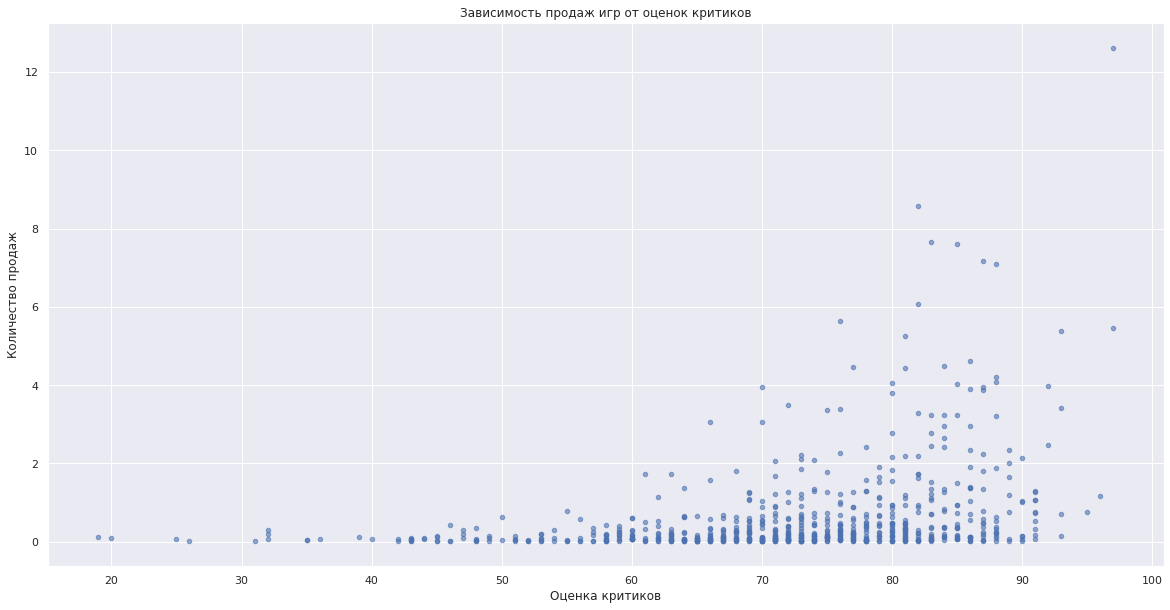

In [34]:
# Посмотрим как на остальных платформах
df_slice.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.6)
plt.title('Зависимость продаж игр от оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

In [35]:
df_slice['all_sales'].corr(df_slice['critic_score'])

0.32810508696636304

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


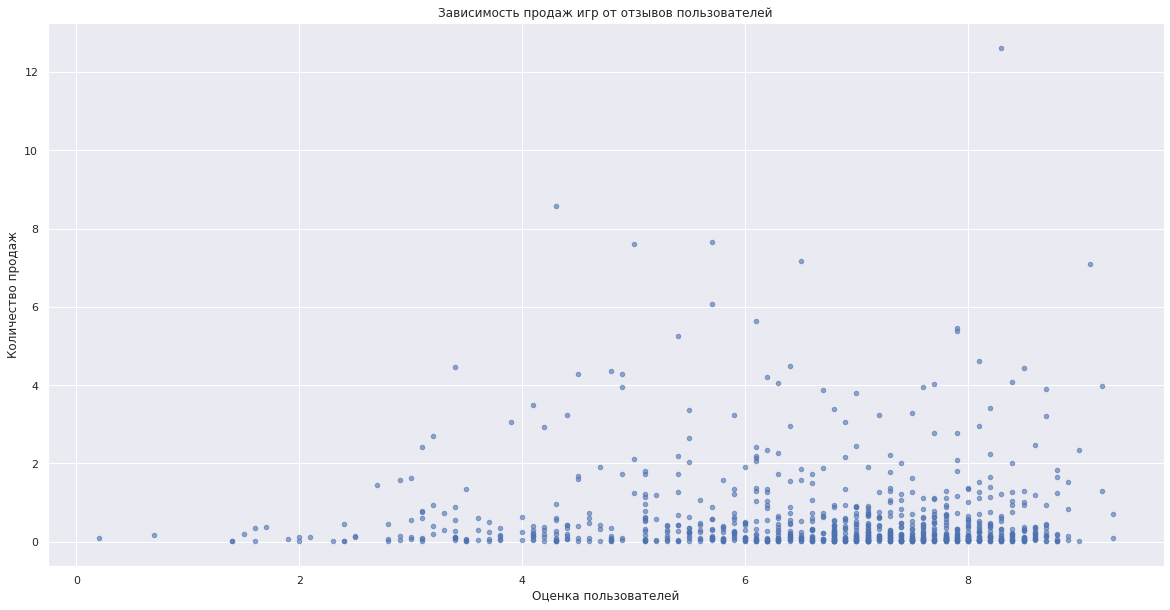

In [36]:
df_slice.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.6)
plt.title('Зависимость продаж игр от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [37]:
df_slice['all_sales'].corr(df_slice['user_score'])

-0.013070305002484562

В общем случае ситуация такая же: оценки критиков вилияют на продажи сильнее оценок пользователей.

In [38]:
# Посмотрим на общее распределение игр по жанрам.
df_slice\
    .pivot_table(index='genre', values='all_sales', aggfunc={'sum', 'count'})\
    .sort_values('sum', ascending=False)

,count,sum
genre,,
action,619,199.36
shooter,128,170.94
sports,161,109.48
role-playing,221,101.44
misc,113,37.55
fighting,60,28.22
racing,69,27.52
platform,38,18.09
adventure,185,17.55


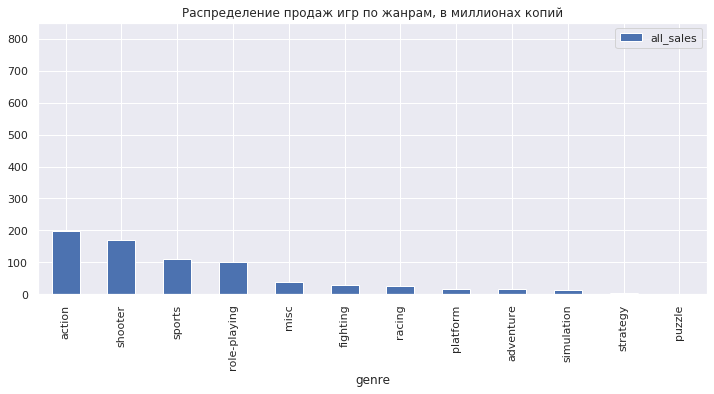

In [39]:
df_slice\
    .pivot_table(index='genre', values='all_sales', aggfunc='sum')\
    .sort_values('all_sales', ascending=False)\
    .plot(kind='bar', grid=True, figsize=(12, 5)).set_ylim(0,850)
plt.title('Распределение продаж игр по жанрам, в миллионах копий')
plt.show()

Самым популярным жанром является action и по количеству выпускаемых игр и по количеству проданных копий - 199 млн.шт. Чуть менее популярны shooter и sports с 170 и 109 млн.проданных копий соответственно. Самыми непопулярными являюся strategy и puzzle.

### Шаг 4. Составьте портрет пользователя каждого региона <a name="fourth-bullet"></a>

In [40]:
df_slice.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

In [41]:
# ТОП-5 платформ по регионам
na_platform = (df_slice.groupby('platform')['na_sales']
               .agg(['sum']).sort_values('sum',ascending=False)
               .head(5)
              )

total_na_sales = df_slice['na_sales'].sum()
total_all_sales = df_slice['all_sales'].sum()
na_platform['part'] = round((na_platform['sum'] / total_na_sales) * 100)
na_platform['part_all'] = round((na_platform['sum'] / total_all_sales) * 100)
na_platform 

,sum,part,part_all
platform,,,
ps4,98.61,35.0,14.0
xone,81.27,29.0,11.0
x360,28.30,10.0,4.0
3ds,22.64,8.0,3.0
ps3,22.05,8.0,3.0


In [42]:
eu_platform = (df_slice.groupby('platform')['eu_sales']
               .agg(['sum']).sort_values('sum',ascending=False)
               .head(5)
              )

total_eu_sales = df_slice['eu_sales'].sum()
eu_platform['part'] = round((eu_platform['sum'] / total_eu_sales) * 100)
eu_platform['part_all'] = round((eu_platform['sum'] / total_all_sales) * 100)
eu_platform 

,sum,part,part_all
platform,,,
ps4,130.04,48.0,18.0
xone,46.25,17.0,6.0
ps3,25.54,9.0,4.0
pc,17.97,7.0,2.0
3ds,16.12,6.0,2.0


In [43]:
jp_platform = (df_slice.groupby('platform')['jp_sales']
               .agg(['sum']).sort_values('sum',ascending=False)
               .head(5)
              )

total_jp_sales = df_slice['jp_sales'].sum()
jp_platform['part'] = round((jp_platform['sum'] / total_jp_sales) * 100)
jp_platform['part_all'] = round((jp_platform['sum'] / total_all_sales) * 100)
jp_platform 

,sum,part,part_all
platform,,,
3ds,44.24,48.0,6.0
ps4,15.02,16.0,2.0
psv,14.54,16.0,2.0
ps3,11.22,12.0,2.0
wiiu,7.31,8.0,1.0


In [44]:
# ТОП-5 жанров по регионам

In [45]:
na_genre = (df_slice.groupby('genre')['na_sales']
               .agg(['sum']).sort_values('sum',ascending=False)
               .head(5)
              )

na_genre['part'] = round((na_genre['sum'] / total_na_sales) * 100)
na_genre

,sum,part
genre,,
shooter,79.02,28.0
action,72.53,26.0
sports,46.13,16.0
role-playing,33.47,12.0
misc,15.05,5.0


In [46]:
eu_genre = (df_slice.groupby('genre')['eu_sales']
               .agg(['sum']).sort_values('sum',ascending=False)
               .head(5)
              )

eu_genre['part'] = round((eu_genre['sum'] / total_eu_sales) * 100)
eu_genre

,sum,part
genre,,
action,74.68,28.0
shooter,65.52,24.0
sports,45.73,17.0
role-playing,28.17,10.0
racing,14.13,5.0


In [47]:
jp_genre = (df_slice.groupby('genre')['jp_sales']
               .agg(['sum']).sort_values('sum',ascending=False)
               .head(5)
              )

jp_genre['part'] = round((jp_genre['sum'] / total_jp_sales) * 100)
jp_genre

,sum,part
genre,,
role-playing,31.16,33.0
action,29.58,32.0
fighting,6.37,7.0
misc,5.61,6.0
shooter,4.87,5.0


По продажам из регионов лидирущее место занимает Северная Америка, в ней самые большие суммарные продажи и по жанрам и по платформам. Пользователи Северной Америки чаще выбирают ps4, 35% всех продаж в регионе приходится на эту платформу. Следом по популярности идет xone c 29% от общих продаж, x360 - с 10% продаж, ps3 и 3ds по 8%. Самые популярные жанры в Северной Америке: action (26%) и shooter(28%), sports - 16%, role-plaing - 12% и misc - 5%. 


В Европе лидирующие позицию по рподажам занимают также ps4 c долей 48% и xone с долей 17% от общих продаж в регионе. PS3 на третьем месте на долю которой приходится 9% всех продаж. Далее pc и 3ds. По жанрам выбор европейце не отличается от северо-американцев, лишь незначительно отличаются доли определенных жанров в общих продажах на 1-3%.

 
Пользователи Японии в своем выборе отличаются от других регионов. Из игровых платформ они предпочитают 3ds - ее доля от всех продаж в регионе составляет 48%. Дальше по популярности идут ps4, psv, ps3, wiiu. А лидирующая в Европе и Америке xone даже не попала в топ-5. Играть они предпочитают в игры жанра role-plaing (который в других регионах на пятом месте по популярности), доля этого жанра в общих продажах по региону - 33% и популярного в других регионах action - на втором месте с долей в продажах 32%.

In [48]:
# Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе
df_slice.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14697,the great mystery hidden object package 5,pc,2015,adventure,0.00,0.03,0.00,0.00,NaN,NaN,no_info,0.03
16476,cartoon network battle crashers,3ds,2016,action,0.01,0.00,0.00,0.00,NaN,NaN,E10+,0.01
9641,project cars,pc,2015,racing,0.00,0.12,0.00,0.01,83.0,7.1,E,0.13
16353,strider (2014),ps3,2014,platform,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01
14416,jojo's bizarre adventure: eyes of heaven,ps3,2015,fighting,0.00,0.00,0.03,0.00,NaN,NaN,no_info,0.03


In [49]:
df_slice['rating'].value_counts()

no_info    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

In [50]:
esrb = ['E', 'E10+', 'M', 'T', 'no_info']
rating_esrb = df_slice.query('rating == @esrb')
rating_esrb.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1129,nba 2k15,x360,2014,sports,1.35,0.11,0.00,0.17,NaN,3.0,E,1.63
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_info,7.98
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
12381,super robot wars og: the moon dwellers,ps3,2016,misc,0.00,0.00,0.06,0.00,NaN,NaN,no_info,0.06
693,yokai watch busters,3ds,2015,action,0.00,0.00,2.29,0.00,NaN,NaN,no_info,2.29


In [51]:
rating_esrb.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'all_sales'], aggfunc={'sum'})

,all_sales,eu_sales,jp_sales,na_sales
,sum,sum,sum,sum
rating,,,,
E,133.13,58.06,8.94,50.74
E10+,71.68,26.16,4.46,33.23
M,226.54,93.44,8.01,96.42
T,99.13,34.07,14.78,38.95
no_info,198.97,58.95,56.90,64.72


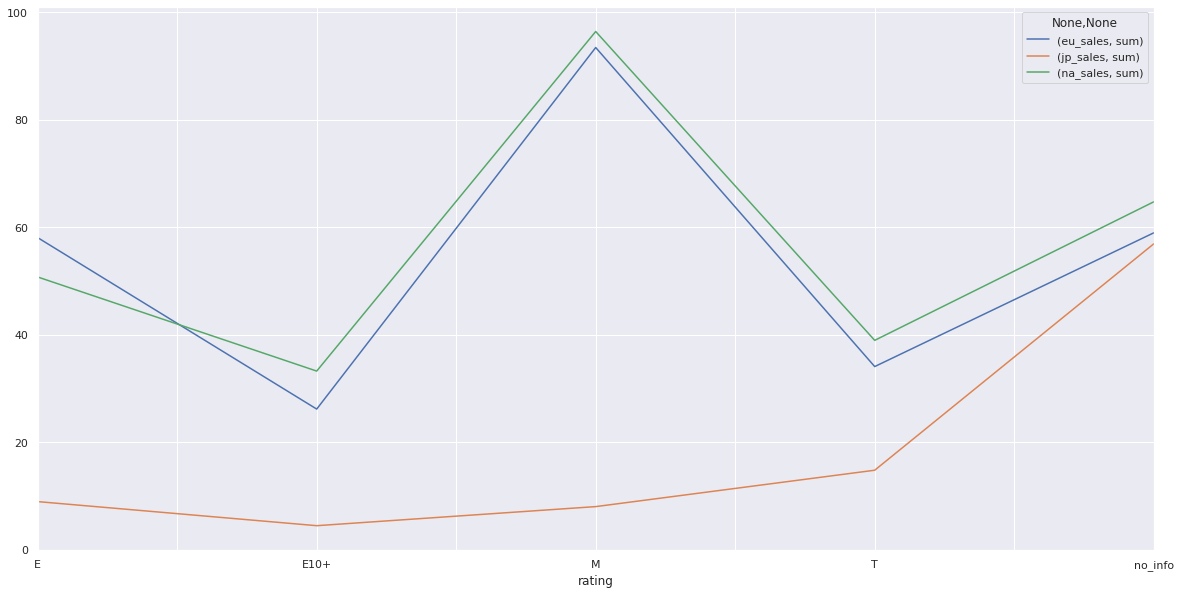

In [52]:
rating_esrb.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc={'sum'}).plot()

Какой-то особенной зависимости продаж от присвоенной игре возрастной категории нет. Продажи взрослых игр М (17+) не сильно превышают продажи игр предназначенных для возрастов Е (6+). Скорее тут играет роль жанр и содержание игры, чем присвоенный рейтинг ESRB. 


В данных по продажам в Японии больше половины проданных игр не имеют рейтинга ESRB. Это связано с тем, что в Японии создана своя организация занимающая присуждением рейтингов - CERO, и другая система рейтингов, поэтому имеющиеся данные, скорее всего, европейские. 

### Шаг 5. Проверьте гипотезы <a name="fifth-bullet"></a>

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Так как нулевая гипотеза всегда формулируется исходя из равенства средних, сформулируем ее как: "Средние пользовательские рейтинги платформ Xbox One и PC равны". Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC различаются". Перед проведением проверки гипотез через T-критерий Стьюдента сравним дисперсии двух выборок. Если они различаются более чем на 5%, то считаем отличие значимым и выбираем equal_var = Fals.

In [53]:
df_new = df_slice[pd.notnull(df_slice['user_score'])]

In [54]:
xone = df_new.query('platform == "xone"')['user_score']
pc = df_new.query('platform == "pc"')['user_score']
np.var(xone, ddof=1)

1.8910066518847013

In [55]:
np.var(pc, ddof=1)

2.901154315133451

In [56]:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось, значит утверждение о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, остается верным.


Проверим, что средние пользовательские рейтинги жанров Action и Sports разные. Сформулируем нулевую гипотезу:"средние пользовательские рейтинги жанров Action и Sports равны". Альтернативныя гипотеза: "средние пользовательские рейтинги жанров Action и Sports различаются".

In [57]:
action = df_new.query('genre == "action"')['user_score']
sports = df_new.query('genre == "sports"')['user_score']
np.var(action, ddof=1)

1.8984766584766581

In [58]:
np.var(sports, ddof=1)

3.446979127609048

In [59]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


В результате проверки мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны, значит  средние рейтинги жанров отличаются.

### Шаг 6. Общий вывод <a name="sixth-bullet"></a>

Все игровые платформы за время своего существования проходят примерно одинаковый путь: период подъема, пик продаж и спад. В среднем он занимает 9 лет, с максимальными продажами в период 4-6 лет после начала продаж. Явными лидерами по продажам за прошлые периоды являются 6 платформ: ps2, x360, ps3, wii, ds, ps - но их пик популярности уже прошел и на смену пришли платформы нового поколения. Так ps3 сменяется на ps4, x360 - на xone, wii - на wiiu. Для ps3 пик продаж приходился на 2011 год и до 2016 года продажи постепенно идут на спад, при этом в 2013 году начинают расти продажи ps4 и на период 2016-2017г (т.е. на 4й-5й год существования) как раз должен приходиться пик продаж. Такая же ситуация и с xone, в 2016г.-2017г. должно быть продано максимальное количество копий. Третья по продажам игр последние два года - платформа 3ds. Даже с учетом неполных данных за 2016год, она за этот год занимает третье место. Возможно, что и в 2017 году, она останется на достойной позиции. По продажам wiiu в 2017 году скорее всего ожидается спад, за предыдущий год продажи уже начали снижаться. Таким образом, наиболее перспективными платформами по продажам на 2017г считаю ps4 и xone.


Самым популярным игровым жанром является action и по количеству выпускаемых игр и по количеству проданных копий - 199 млн.шт. Чуть менее популярны shooter и sports с 170 и 109 млн.проданных копий соответственно. Самыми непопулярными являюся strategy и puzzle.

По продажам лидирущее место из регионов занимает Северная Америка, в ней самые большие суммарные продажи и по жанрам и по платформам. Пользователи Северной Америки чаще выбирают ps4, 35% всех продаж в регионе приходится на эту платформу. Следом по популярности идет xone c 29% от общих продаж, x360 - с 10% продаж, ps3 и 3ds по 8%. Самые популярные жанры в Северной Америке: action (26%) и shooter(28%), sports - 16%, role-plaing - 12% и misc - 5%. 


В Европе лидирующие позицию по рподажам занимают также ps4 c долей 48% и xone с долей 17% от общих продаж в регионе. PS3 на третьем месте на долю которой приходится 9% всех продаж. Далее pc и 3ds. По жанрам выбор европейце не отличается от северо-американцев, лишь незначительно отличаются доли определенных жанров в общих продажах на 1-3%.


Пользователи Японии в своем выборе отличаются от других регионов. Из игровых платформ они предпочитают 3ds - ее доля от всех продаж в регионе составляет 48%. Дальше по популярности идут ps4, psv, ps3, wiiu. А лидирующая в Европе и Америке xone даже не попала в топ-5. Играть они предпочитают в игры жанра role-plaing (который в других регионах на пятом месте по популярности), доля этого жанра в общих продажах по региону - 33% и популярного в других регионах action - на втором месте с долей в продажах 32%.

Какой-то особенной зависимости продаж от присвоенной игре возрастной категории нет. Продажи взрослых игр М (17+) не сильно превышают продажи игр предназначенных для возрастов Е (6+). Скорее тут играет роль жанр и содержание игры, чем присвоенный рейтинг ESRB.
Достаточно сильно на продажи влияют оценки критиков, тогда как оценки пользователей влияют незначительно.

В результате проверки гипотез остается верным утверждение о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports отличаются.